## SALES PREDICTION

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [123]:
# Loading dataset into a dataframe
df0 = pd.read_csv("advertising.csv")


# Displaying first few rows of the dataframe
df0.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### Data Exploration

In [124]:
# Gathering basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [125]:
# Displaying the shape of the dataset
df0.shape

(200, 4)

In [126]:
# Displaying the size of the dataset
df0.size

800

In [127]:
# Gathering descriptive statistics about the data
df0.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [128]:
# Checking for missing values
df0.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [129]:
# Checking for duplicates
df0.duplicated().sum()

0

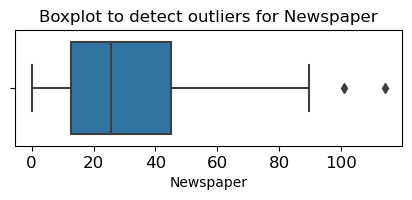

In [130]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for Newspaper', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Newspaper'])
plt.show()

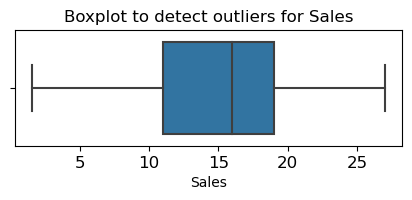

In [131]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Sales'])
plt.show()

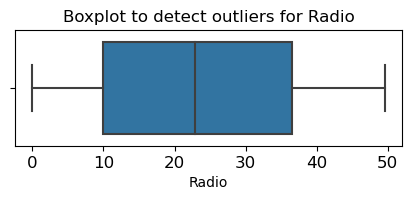

In [132]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for Radio', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Radio'])
plt.show()

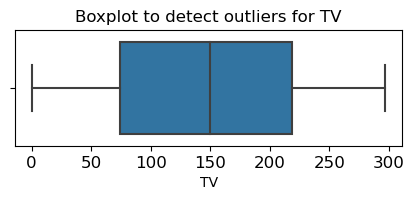

In [133]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for TV', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['TV'])
plt.show()

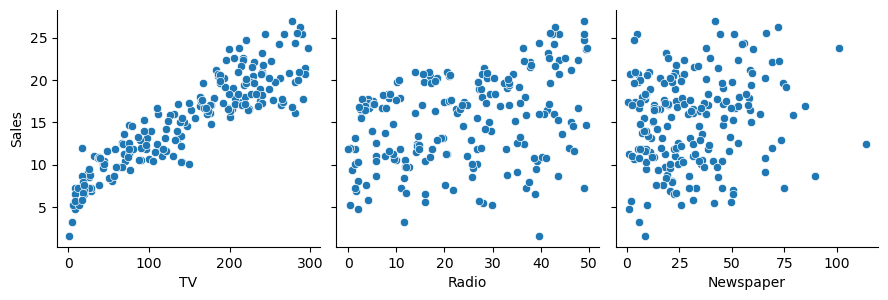

In [134]:
# Creating a scatter plot of the data to see how they are related.
sns.pairplot(df0, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=3)
plt.show()


The linearity assumption holds for TV, as there is a clear linear relationship in the scatterplot between TV and Sales

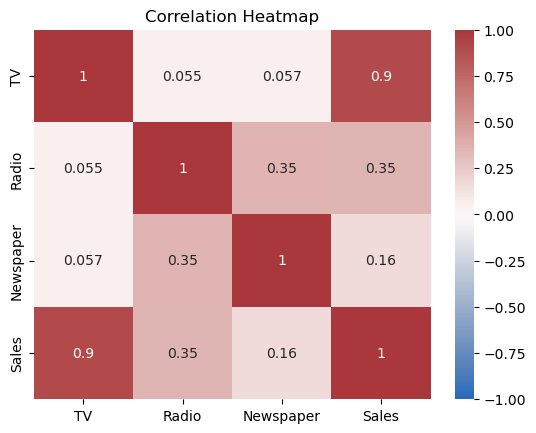

In [135]:
corr_matrix = df0.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()


 TV spending exhibits the strongest positive correlation (0.9) with sales, suggesting a significant impact, while Radio and Newspaper show weaker correlations (0.35 and 0.16, respectively). There's a minor positive correlation (0.057) between TV and Radio spending. Key insights highlight the substantial influence of TV advertising on sales, a smaller positive impact from Radio, and the weakest correlation with Newspaper. 

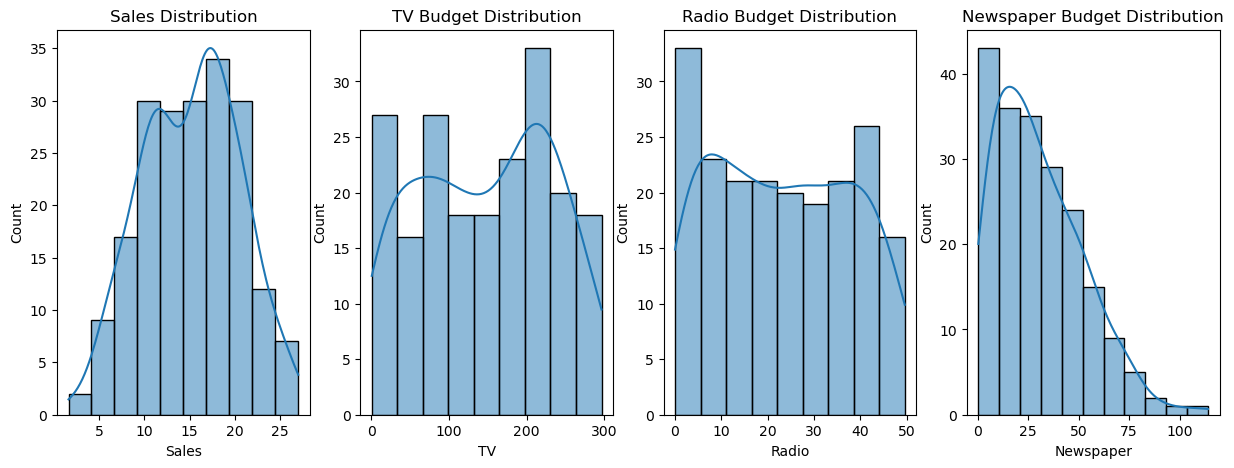

In [136]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(df0['Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(1, 4, 2)
sns.histplot(df0['TV'], kde=True)
plt.title('TV Budget Distribution')

plt.subplot(1, 4, 3)
sns.histplot(df0['Radio'], kde=True)
plt.title('Radio Budget Distribution')

plt.subplot(1, 4, 4)
sns.histplot(df0['Newspaper'], kde=True)
plt.title('Newspaper Budget Distribution')

plt.show()


The sales distribution is slightly right-skewed, indicating more frequent lower sales values and a few higher ones, with a range of 5 to 25 units and a central tendency around 10-15 units. The TV budget distribution is bimodal, showing two distinct spending patterns with a wide range from 0 to 300 units, clustering around 100-150 units and 200-250 units. Radio budget distribution is roughly uniform, ranging from 0 to 50 units, with no clear peak, suggesting diverse spending levels. The newspaper budget distribution is right-skewed, favoring lower budgets with occasional higher investments, spanning 0 to 100 units, and peaking around 25-50 units.

## Model Approach:

### Multiple linear regression

For sales prediction with multiple features such as "TV," "Radio," and "Newspaper," multiple regression will be used. Multiple linear regression involves predicting a target variable (in this case, "Sales") based on two or more independent variables (features). The general form of the equation for multiple linear regression is:
Y = β0
​
 +β1
​
 ⋅X1
​
 +β2
​
 ⋅X2
​
 +…+βn
​
 ⋅Xn
​
 +ϵ

In [137]:
# Defining the OLS formula.
ols_formula = 'Sales ~ TV + Radio + Newspaper'

# Creating an OLS model.
OLS = ols(formula=ols_formula, data=df0)

# Fitting the model.
model = OLS.fit()

# Saving the results summary.
model_results = model.summary()

# Displaying the model results.
print(model_results)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           8.13e-99
Time:                        15:12:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

The model exhibits a robust fit (R-squared = 0.903), implying that approximately 90.3% of the sales variability can be accounted for by the model. 

Both TV and Radio advertising budgets show statistically significant positive effects on sales, with coefficients of 0.0544 and 0.1070, respectively. 
TV Coef=0.0544: For each unit increase in TV advertising budget, Sales is expected to increase by 0.0544 units.
Radio Coef=0.1070: For each unit increase in Radio advertising budget, Sales is expected to increase by 0.1070 units.

Conversely, The p-value for Newspaper is high (0.954), suggesting that it might not be a statistically significant predictor.
Coef=0.0003: For each unit increase in Newspaper advertising budget, Sales is expected to increase by 0.0003 units. The Newspaper advertising budget appears to lack a substantial impact on sales prediction.

In summary, the model suggests that investments in TV and Radio advertising exert more influential roles in driving sales, while the contribution of Newspaper advertising seems negligible in this specific context. 

### Model assumption: Linearity

Creating scatterplots comparing the independent variables with Sales to check the linearity assumption

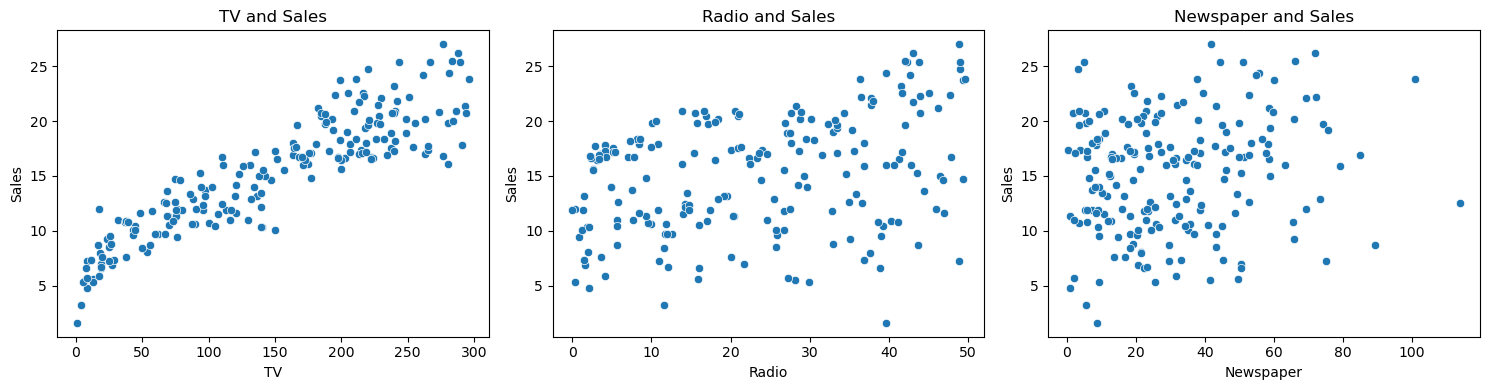

In [138]:
# Creating a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Creating a scatterplot between TV and Sales.
sns.scatterplot(x=df0['TV'], y=df0['Sales'], ax=axes[0])
axes[0].set_title("TV and Sales")

# Creating a scatterplot between Radio and Sales.
sns.scatterplot(x=df0['Radio'], y=df0['Sales'], ax=axes[1])
axes[1].set_title("Radio and Sales")
axes[1].set_xlabel("Radio")

# Creating a scatterplot between Newspaper and Sales.
sns.scatterplot(x=df0['Newspaper'], y=df0['Sales'], ax=axes[2])
axes[2].set_title("Newspaper and Sales")
axes[2].set_xlabel("Newspaper")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()


The linearity assumption holds for TV, as there is a clear linear relationship in the scatterplot between TV and Sales

### Model assumption: Normality

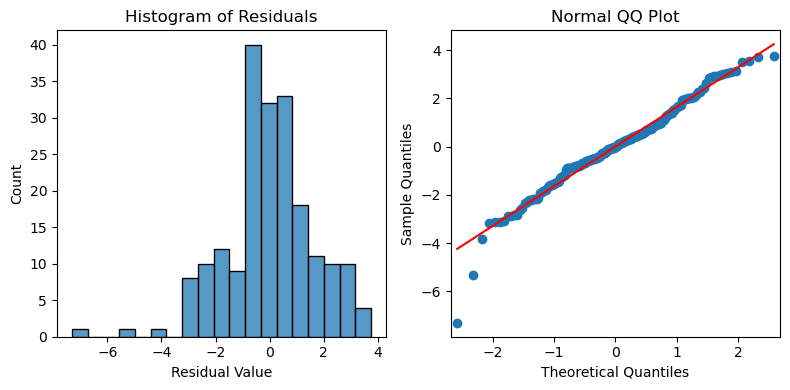

In [139]:
# Calculating the residuals. 
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Creating a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Creating a Q-Q plot of the residuals 
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

# Using matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Showing the plot.
plt.show()

The **histogram of residuals** displays an approximately symmetrical shape, indicating a lack of strong skewness towards positive or negative values, suggesting the model is not consistently overestimating or underestimating. The spread of data points across the x-axis suggests moderate variability in the residuals, while the presence of a few outliers, potentially indicating high leverage or measurement errors, warrants further investigation.

The **QQ plot reveals** that the residuals follow the diagonal line representing a normal distribution, signifying approximate normality. However, deviations, particularly in the tails, suggest minor departures from normality. The slight deviation in the tails could indicate the presence of heavier tails with more extreme values than expected in a truly normal distribution

### Model assumption: Constant variance

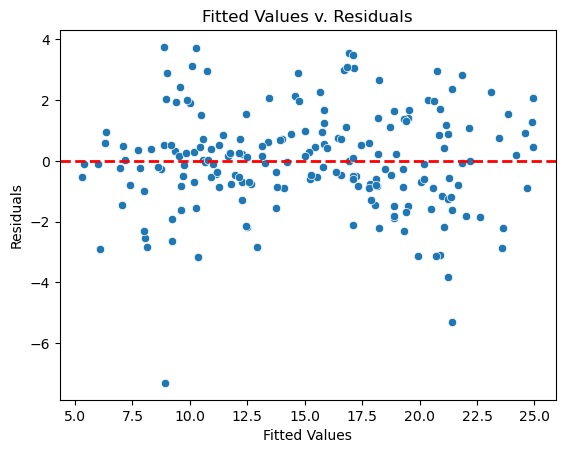

In [140]:
# Creating a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

# Adding a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0, color='red', linestyle='--', linewidth=2) 

# Show the plot.
plt.show()

The scatter plot of residuals against fitted values indicates a random distribution, suggesting no strong pattern or correlation between the fitted values and residuals. 

This randomness signifies that the linear regression model effectively captures the underlying trend in the data, and the residuals are independent. 

The absence of systematic bias is reflected in the roughly equal spread of data points above and below the zero line. 

Additionally, homoscedasticity is observed, as the spread of residuals remains consistent across the range of fitted values. Despite a few outliers, potentially indicating high leverage or measurement errors, the overall insights suggest a well-fitting linear regression model with no pronounced bias or heteroscedasticity, emphasizing the need for investigating the outliers' impact on the model.

### Model assumption: No multicollinearity

The no multicollinearity assumption states that no two independent variables (Xi and Xj) can be highly correlated with each other.

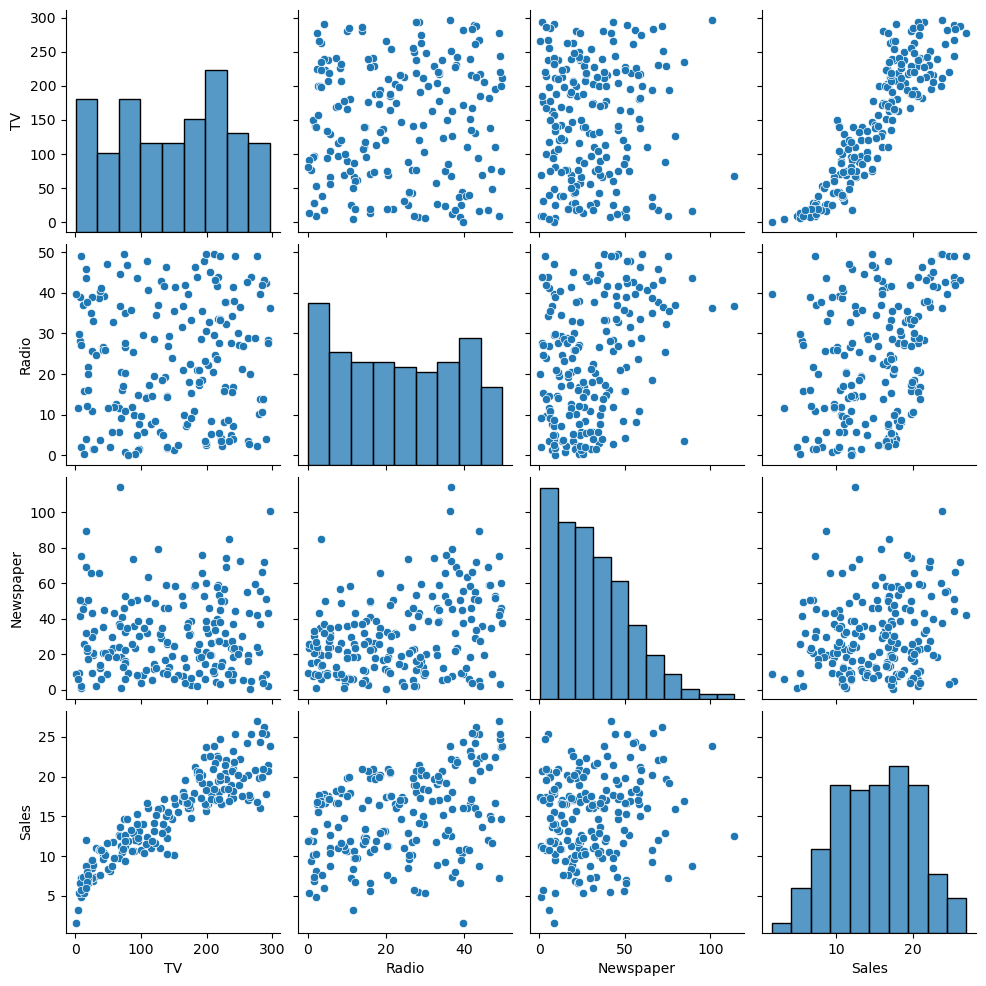

In [141]:
# Creating a pairplot of the data with a specific color palette.
sns.pairplot(df0)

# Showing the plot.
plt.show()


## Results and evaluation

In [142]:
# Displaying the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           8.13e-99
Time:                        15:12:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using **TV, Radio, and Newspaper** as the independent variables results in a multiple linear regression model with
R-squared of 0.903. It indicates a strong explanatory power of the model, suggesting that the variation in Sales is well-captured by the included independent variables.

#### model coefficients

β0 = 4.6251

βTV = 0.0544

βRadio = 0.1070

βNewspaper = 0.0003


#### Relationship between Sales and the independent variables as a linear equation

Y = β0 ​ +β1 ​ ⋅X1 ​ +β2 ​ ⋅X2 ​ +…+βn ​ ⋅Xn ​ +ϵ

Y=β0 ​ +βTV ​ ⋅TV+βRadio ​ ⋅Radio+βNewspaper ​ ⋅Newspaper

Sales=4.6251+0.0544⋅TV+0.1070⋅Radio+0.0003⋅Newspaper

### Summary of the model

In this multiple linear regression model, the intercept (β0​) represents the estimated baseline value of Sales when all predictor variables (TV, Radio, Newspaper) are zero, yielding a value of 4.6251. The intercept is statistically significant, as indicated by a very low p-value (0.000). 

For the TV variable (βTV​), a positive coefficient of 0.0544 suggests that for each additional unit increase in the TV advertising budget, Sales are expected to increase by 0.0544 units, assuming other variables are constant. 
The coefficient for TV is statistically significant (p-value = 0.000). 

Similarly, the Radio variable (βRadio​) has a positive coefficient of 0.1070, indicating that each additional unit increase in the Radio advertising budget is associated with a 0.1070-unit increase in Sales. The coefficient for Radio is also statistically significant (p-value = 0.000). 

However, for the Newspaper variable (βNewspaper​), the low coefficient of 0.0003 suggests a minimal impact on Sales for each additional unit increase in the Newspaper advertising budget, and this coefficient is not statistically significant (p-value = 0.954). 

In summary, the coefficients for TV and Radio are statistically significant, implying that changes in their advertising budgets have a significant impact on Sales. On the other hand, the coefficient for Newspaper is not statistically significant, suggesting that changes in the Newspaper advertising budget may not significantly affect Sales in the context of this model.






### Recommendations and Next Steps:

**Recommendations:**

Allocate resources strategically, as TV and Radio advertising seem to have a more substantial impact on Sales.

Consider further investigation into the effectiveness of Newspaper advertising or explore additional variables that might influence Sales.

**Next Steps:**

Validate the model's performance using additional data or through cross-validation techniques.

Explore interactions between variables to capture potential synergistic effects.

Evaluate the model against business objectives and gather feedback from stakeholders to refine and improve it.